(sec:LTI-random)=
# 8. Odziv linearnih sistemov na naključno vzbujanje

Vrnimo se k linearnemu sistemu z eno prostostno stopnjo (glejte lastnosti: {ref}`sec:LTI_lastnosti`):

$$
	\underbrace{f(t)}_{\textrm{Vzbujanje}}\to {\fbox{Sistem}}\to \underbrace{x(t)}_{\textrm{Odziv}}.
$$

Odziv na deterministično vzbujanje izračunamo s pomočjo konvolucije:

$$
	x(t) = \int_{-\infty}^{t}\,f(\tau)\,h(t-\tau)\,\textrm{d}  \tau =
	\int_{0}^{+\infty}\,h(\tau)\,f(t-\tau)\,\textrm{d}  \tau,
$$

kjer je $h(t)$ impulzna prenosna funkcija, ki definira linearni sistem.

## Srednja vrednost odziva

V nadaljevanju bomo predpostavili, da je vzbujanje $f(t)$ naključno in izračunajmo najprej pričakovano srednjo vrednost odziva. Uporabiti moramo operator pričakovanja $E[]$:

$$
	\mu_x = E[x(t)] = E\Big[
	\int_{0}^{+\infty}\,h(\tau)\,f(t-\tau)\,\textrm{d}  \tau \Big],
$$

ker je naključna vrednost samo pri vzbujanju $f(t)$, sledi

$$
	\mu_x = 
	\int_{0}^{+\infty}\,h(\tau)\,E\big[f(t-\tau)\big]\,\textrm{d}  \tau
    = 
	\int_{0}^{+\infty}\,h(\tau)\,\mu_f\,\textrm{d}  \tau ,
    = 
	\mu_f\,\int_{0}^{+\infty}\,h(\tau)\,\textrm{d}  \tau ,
$$
Od tukaj pa sledi sklep:

:::{note}

Če opazujemo proces, ki ima na vhodu/vzbujanju srednjo vrednost enako nič, bo tudi srednja vrednost odziva enaka nič (ne glede na impulzno prenosno funkcijo):

$$
\mu_x = \mu_f\,\int_{0}^{+\infty}\,h(\tau)\,\textrm{d}  \tau ,
$$

:::

## Avtokorelacija

Tukaj želimo odgovoriti na vprašanje kako je avtokorelacija vzbujanja $R_{ff}(\tau)$ povezana z avtokorelacijo odziva $R_{xx}(\tau)$, poglejmo detajle:

$$
\begin{split}
R_{xx}(\tau)&=E\big[x(t)\,x(t+\tau)\big]\\
&=E\Big[\int_{0}^{+\infty}\int_{0}^{+\infty}\,h(\tau_1)\,f(t-\tau_1)\,\,h(\tau_2)\,f(t+\tau-\tau_2)\,\textrm{d}  \tau_1\,\textrm{d}  \tau_2\Big]
\end{split}
$$

Nadaljujemo z izpeljavo: ker je $h(t)$ enolično determinirana, velja $h(t)=E[h(t)]$:

$$
R_{xx}(\tau)
=\int_{0}^{+\infty}\int_{0}^{+\infty}\,h(\tau_1)\,h(\tau_2)\,E\Big[f(t-\tau_1)\,f(t+\tau-\tau_2)\big]\,\textrm{d}  \tau_1\,\textrm{d}  \tau_2
$$

Uporabimo zamenjavo $t_1=t-\tau_1$ iz česar sledi $E\Big[f(t-\tau_1)\,f(t+\tau-\tau_2)\big]=E\Big[f(t_1)\,f(t_1+\tau_1+\tau-\tau_2)\big]=R_{ff}(\tau+\tau_1-\tau_2)$ in nato:

$$
R_{xx}(\tau)
=\int_{0}^{+\infty}\int_{0}^{+\infty}\,h(\tau_1)\,h(\tau_2)\,R_{ff}(\tau+\tau_1-\tau_2)\,\textrm{d}  \tau_1\,\textrm{d}  \tau_2
$$

Naredimo sedaj prehod v frekvenčno domeno:

$$
\begin{split}
S_{xx} &= \int_{-\infty}^{+\infty}R_{xx}(\tau)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,\tau}\,\textrm{d}\tau\\
&=
\underbrace{\int_{0}^{+\infty}\,h(\tau_1)\,\mathrm{e}^{+\textrm{i}\,2\pi\,f\,\tau_1}\,\textrm{d}  \tau_1}_{H^*(f)}\,
\underbrace{\int_{0}^{+\infty}\,h(\tau_2)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,\tau_2}\,\textrm{d}  \tau_2}_{H(f)}\,
\underbrace{\int_{-\infty}^{+\infty}R_{ff}(u)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,u}\,\textrm{d}  u}_{S_{ff}(f)}.
\end{split}
$$

Opomba: v zgornjem izrazu smo uporabili zamenjavo: $u=\tau+\tau_1-\tau_2$ in posledično $\mathrm{e}^{-\textrm{i}\,2\pi\,f\,\tau}=\mathrm{e}^{-\textrm{i}\,2\pi\,f\,(u-\tau_1+\tau_2)}$ ter nato ločili integracijske spremenljivke.

Končni rezultat je:

:::{note}

Avto-spektralna gostota moči na odzivni strani je definirana kot:

$$
S_{xx} = H^*(f)\,H(f)\,S_{ff}(f),
$$

kjer ${}^*$ označuje kompleksno konjugirano vrednost.

:::

## Križna korelacija

Poglejmo si sedaj še križno korelacijo $R_{fx}(\tau)$ vzbujanja $f(t)$ in odziva $x(t)$:

$$
\begin{split}
R_{fx}(\tau)&=E\big[f(t)\,x(t+\tau)\big]\\
&=E\Big[\int_{0}^{+\infty}f(t)\,h(\tau_1)\,f(t+\tau-\tau_1)\,\textrm{d}  \tau_1\Big]\\
&=\int_{0}^{+\infty}h(\tau_1)\,E\big[f(t)\,f(t+\tau-\tau_1)\big]\,\textrm{d}  \tau_1\\
&=\int_{0}^{+\infty}h(\tau_1)\,R_{ff}(\tau-\tau_1)\,\textrm{d}  \tau_1
\end{split}
$$

Naredimo sedaj prehod v frekvenčno domeno:

$$
\begin{split}
S_{fx} &= \int_{-\infty}^{+\infty}R_{fx}(\tau)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,\tau}\,\textrm{d}\tau\\
&=
\underbrace{\int_{0}^{+\infty}\,h(\tau_1)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,\tau_1}\,\textrm{d}  \tau_1}_{H(f)}\,
\underbrace{\int_{-\infty}^{+\infty}R_{ff}(u)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,u}\,\textrm{d}  u}_{S_{ff}(f)}.
\end{split}
$$

Opomba: v zgornjem izrazu smo uporabili zamenjavo: $u=\tau-\tau_1$ in posledično $\mathrm{e}^{-\textrm{i}\,2\pi\,f\,\tau}=\mathrm{e}^{-\textrm{i}\,2\pi\,f\,(u+\tau_1)}$ ter nato ločili integracijske spremenljivke.
Končni rezultat je:

:::{note}

Križno-spektralna gostota moči je definirana kot:

$$
S_{fx} = H(f)\,S_{ff}(f).
$$

:::

Za razliko od avto-spektralne gostoste križno-spektralna gostota ohranja fazno informacijo!

### Zgled

S pomočjo zgleda spodaj si bomo pogledali avto- in križno- spektralno gostoto na naključno generiranih, normalno porazdeljenih, podatkih.

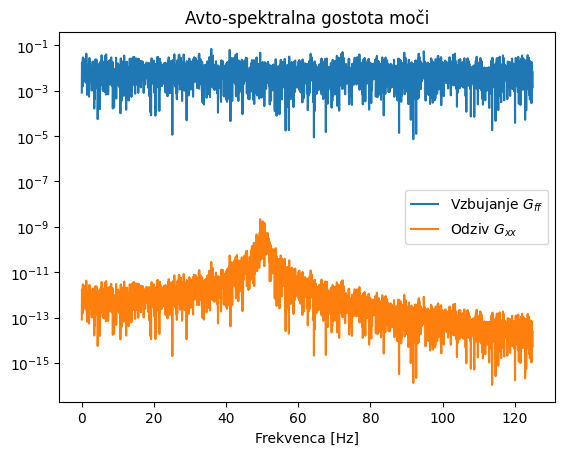

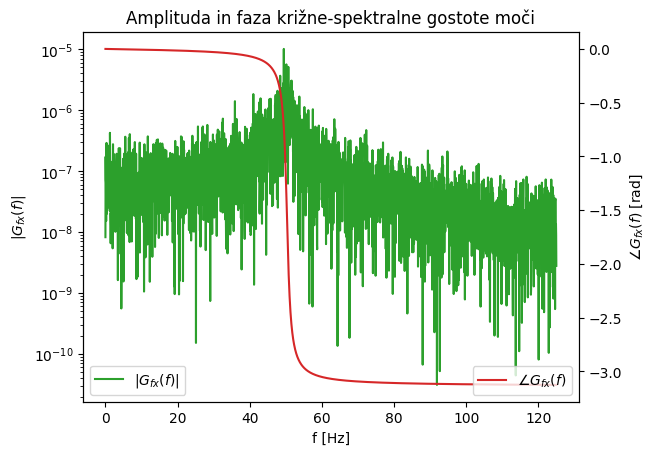

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
N = 5000
fs = 250
dt = 1./fs
f = rng.normal(size=N)
time = np.arange(N)*dt

F = np.fft.rfft(f)
scale = 1.0 / (fs*N)
freq = np.fft.rfftfreq(N, d=dt)
G_ff = 2*scale*np.abs(F.conj()*F)

def alpha(freq, m, k, c):
    """
    Frekvenčna prenosna funkcija linearnega oscilatorja.
    """
    omega = 2*np.pi*freq
    return 1 / (-omega**2*m + 1j*omega*c + k)

H = alpha(freq, m=1,k=1e5,c=10)
G_xx = np.abs(H.conj()*H*G_ff)
G_fx = H*G_ff

plt.title('Avto-spektralna gostota moči')
plt.semilogy(freq, G_ff, label='Vzbujanje $G_{ff}$')
plt.semilogy(freq, G_xx, label='Odziv $G_{xx}$')
plt.xlabel('Frekvenca [Hz]')
plt.legend()
plt.show()


fig, ax = plt.subplots()
ax.set_title('Amplituda in faza križne-spektralne gostote moči')
ax.semilogy(freq, np.abs(G_fx), color='C2', label='$|G_{fx}(f)|$')
ax.legend(loc=3)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('$|G_{fx}(f)|$')
ax2 = ax.twinx() 
ax2.plot(freq, np.angle(G_fx), color='C3', label='$\\angle G_{fx}(f)$')
ax2.set_xlabel('f [Hz]')
ax2.set_ylabel('$\\angle G_{fx}(f)$ [rad]')
ax2.legend(loc=4)
plt.show()

# Zgled 2

Poglejmo si še, kako spektralno gostoto povprečimo in s tem zmanjšamo frekvenčno natančnost in amplitudni raztros.

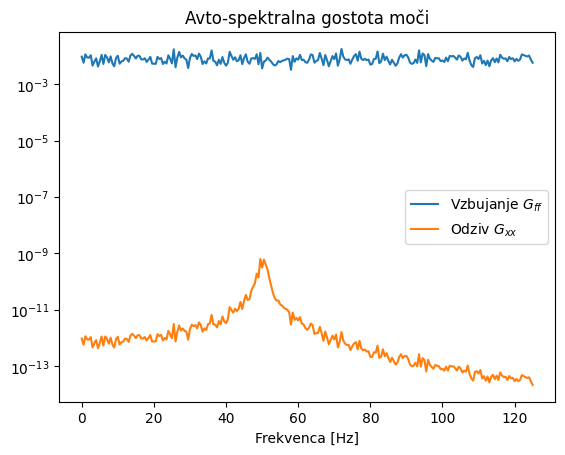

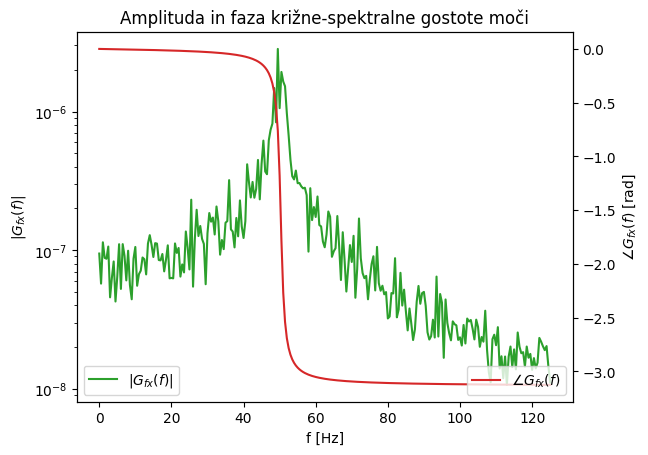

In [2]:
from scipy import signal

odsekov = 10
N_ = N//odsekov
win = signal.windows.boxcar(N_)              # okno
scale = 1.0 / (fs*(win*win).sum())

G_ff = np.zeros(N_//2+1, dtype=complex)

for i in range(odsekov):
    f_ = f[i*N_:(i+1)*N_]
    f_w = win*f_          # okno
    F = np.fft.rfft(f_w)  # fft
    G_ff += scale*2*np.conj(F) * F / odsekov

G_ff = np.abs(G_ff)
freq = np.fft.rfftfreq(N_, d=dt)
H = alpha(freq, m=1, k=1e5, c=10)
G_xx = np.abs(H.conj()*H*G_ff)
G_fx = H*G_ff

plt.title('Avto-spektralna gostota moči')
plt.semilogy(freq, G_ff, label='Vzbujanje $G_{ff}$')
plt.semilogy(freq, G_xx, label='Odziv $G_{xx}$')
plt.xlabel('Frekvenca [Hz]')
plt.legend()
plt.show()


fig, ax = plt.subplots()
ax.set_title('Amplituda in faza križne-spektralne gostote moči')
ax.semilogy(freq, np.abs(G_fx), color='C2', label='$|G_{fx}(f)|$')
ax.legend(loc=3)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('$|G_{fx}(f)|$')
ax2 = ax.twinx() 
ax2.plot(freq, np.angle(G_fx), color='C3', label='$\\angle G_{fx}(f)$')
ax2.set_xlabel('f [Hz]')
ax2.set_ylabel('$\\angle G_{fx}(f)$ [rad]')
ax2.legend(loc=4)
plt.show()

## Koherenca

:::{note}

Koherenca je definirana kot:

$$
\gamma_{fx}^2(f)=\frac{|G_{fx}(f)|^2}{G_{ff}(f)\,G_{xx}(f)}
=\frac{|S_{fx}(f)|^2}{S_{ff}(f)\,S_{xx}(f)}
$$

:::

in predstavlja merilo linearne povezanosti med vhodom (vzbujanjem $f$) in izhodom (odzivom $x$) sistema. 

Ker velja:

$$
|\underbrace{S_{fx}(f)}_{\frac{1}{T}\, F^*(f) \, X(f)}|^2\le \underbrace{S_{ff}(f)}_{\frac{1}{T}\, F^*(f) \, F(f)}\,\overbrace{S_{xx}(f)}^{\frac{1}{T}\, X^*(f) \, X(f)},
$$

se koherenca $\gamma_{fx}^2(f)$ nahaja v območju od 0 do 1:

$$
0\le\gamma_{fx}^2(f)\le 1
$$

Če je koherenca 0, to pomeni, da vzbujanje in odziv nista povezana, če je koherenca 1, pa to pomeni, da sta vzbujanje in odziv linearno odvisna. Odstopanje od 1 se izmeri tudi takrat, ko imamo v meritvi šum, obravnavamo nelinearen sistem ali pa je odziv posledica (tudi) drugih vzbujanj in ne samo $f(t)$.

(sec:cenilke_FRF)=
## Cenilke frekvenčne prenosne funkcije

Različne oblike frekvenčne prenosne funkcije (FRF) smo teoretično spoznali v poglavju: {ref}`sec:frf`. Tukaj si bomo pogledali kako FRF ocenimo na podlagi izmerjenih podatkov, pri tem pa se bomo omejili na sisteme z enim (sočasnim) vzbujanjem in enim (sočasnim) odzivom (to so tako imenovani SISO sistemi: ang. *single input, single otput*).

Linearni, časovno invariantni SISO sistem je mogoče predstaviti z blokovnim diagramom na sliki spodaj, kjer je $f(t)$ vzbujevalna sila, $h(t)$ je impulzna prenosna funkcija in $x(t)$ je odziv; $F(\omega)$, $\alpha(\omega)$ in $X(\omega)$ so njihovi pari v frekvenčni domeni.

![random_ensemble](./images/FRF_nonoise.svg)

FRF je za naključni proces definirana z $\alpha(\omega)=S_{fx}/S_{ff}$, kjer sta $S_{ff}$ in $S_{fx}$ avto- in križna-spektralna gostota moči.

Slika spodaj prikazuje SISO sistem, kjer sta $u(t)$ in $v(t)$ resnični vhod (vzbujanje) in resnični izhod (odziv) sistema. $m(t)$ predstavlja izmerjeni šum na vhodu $f(t)$ in $n(t)$ predstavlja izmerjeni šum na izhodu $x(t)$. Velike črke so ustrezne količine frekvenčne domene.

![random_ensemble](./images/FRF_noise.svg)

Merilni šum je vedno prisoten in nam preprečuje, da bi izmerii dejanske vrednosti, ki vstopajo ali izstopajo v/iz sistema. Slika kaže, da v resnici ni mogoče izmeriti dejanskega vhoda v sistem $u(t)$ in tudi ni mogoče izmeriti dejanskega izhoda sistema $v(t)$. Namesto tega merimo vhod s šumom:

$$
f(t)=u(t)+m(t)
$$

in izhod s šumom:

$$
x(t)=v(t)+n(t).
$$

Za poljubne korelacije med signaloma $u(t)$ in $v(t)$ ter šumom $m(t)$ in $n(t)$ lahko definiramo avto- in križno-spektralno gostoto moči:

$$
\begin{split}
S_{ff}(\omega) &= S_{uu}(\omega) + S_{mm}(\omega) + S_{mu}(\omega) + S_{um}(\omega),\\
S_{xx}(\omega) &= S_{vv}(\omega) + S_{nn}(\omega) + S_{nv}(\omega) + S_{vn}(\omega),\\
S_{fx}(\omega) &= S_{uv}(\omega) + S_{un}(\omega) + S_{mv}(\omega) + S_{mn}(\omega).
\end{split}
$$

Vhod $u(t)$ in izhod $v(t)$ sistema sta povezana s pomočjo FRF:

$$
\begin{split}
S_{vv}(\omega)&=|\alpha(\omega)|^2\,S_{uu}(\omega),\\
S_{uv}(\omega)&=\alpha(\omega)\,S_{uu}(\omega).
\end{split}
$$

V nadaljevanju bomo poskušali iz meritev s šumom ($f(t)=u(t)+m(t)$ in $x(t)=v(t)+n(t)$) oceniti dejansko frekvenčno prenosno funkcijo.

### Cenilka $\hat{H}_1$

Pri merjenju vzbujanja $f(t)$ in odziva $x(t)$ slednji običajno pokriva višji dinamični razpon (v meritvi imamo relativno velike vrednosti in tudi relativno majhne) in je zato bolj občutljiv na merilni šum. Zaradi tega predpostavimo, da vhodnega šuma ni ($m(t)=0$), posledično velja:

$$
S_{mm}(\omega)=0,\quad S_{mn}(\omega)=0,\quad S_{mu=0}(\omega)=0,\quad S_{mv}(\omega)=0
$$

in da izhodni šum $n(t)$ ni koreliran s sistemom, torej velja:

$$
S_{un}(\omega)=0.
$$

Posledično se avto- in križne-spektralne gostote poenostavijo:

$$
\begin{split}
S_{ff}(\omega) &= S_{uu}(\omega),\\
S_{xx}(\omega) &= S_{vv}(\omega) + S_{nn}(\omega),\\
S_{fx}(\omega) &= S_{uv}(\omega).
\end{split}
$$

Iz zadnje enačbe lahko na podlagi merjenih podatkov ($x(t)$ in $f(t)$) ocenimo dejansko FRF: $S_{fx}(\omega)= S_{uv}(\omega)$. S pomočjo povezave $S_{uv}(\omega)=\alpha(\omega)\,S_{uu}(\omega)$ lahko FRF ocenimo kot:

:::{note}

Cenilka $\hat{H}_1(\omega)$:

$$
\begin{split}
\hat{H}_1(\omega)&=\hat{\alpha}_1(\omega)=\frac{\hat{S}_{fx}(\omega)}{\hat{S}_{ff }(\omega)},
\end{split}
$$

:::

kjer smo uporabili simbol $\hat{~}$ za označevanje ocene iz meritve. Pri tem je pomembno, da avto- $\hat{S}_{ff}(\omega)$ in križno- $\hat{S}_{fx} (\omega)$ spektralno gostoto moči dobimo s povprečenjem naključnega procesa (glejte zgled spodaj).

Za oceno kvalitete in linearnosti meritve, potrebujemo še koherenco:

$$
\begin{split}
\hat{\gamma}_{fx}^2&=\frac{|\hat{S}_{fx}|^2}{\hat{S}_{ff}\,\big(\underbrace{{S}_{vv}+S_{nn}}_{\hat{S}_{xx}}\big)},
\end{split}
$$

kar kaže, da šum na izhodu $S_{nn}(\omega)$ zmanjša koherenco in s tem kakovost ocenjenega FRF.

Če vzbujevalnega šuma $m(t)$ ni mogoče zanemariti, potem velja $S_{ff}=S_{uu}+S_{mm}$ in:

$$
\begin{split}
\hat{H}_1(\omega)&=\frac{\hat{S}_{fx}(\omega)}{\hat{S}_{uu}(\omega)+\hat{S}_{mm}(\omega)}.
\end{split}
$$

Sledi, da cenilka $\hat{H}_1$ zaradi šuma na vhodu podceni pravi FRF $\alpha=S_{uv}/S_{uu}$.

### Cenilka $\hat{H}_2$

Tukaj raziskujemo oceno FRF, ko šuma meritve na strani vzbujanja ni mogoče zanemariti, vendar ta ni koreliran s sistemom. Nadalje predpostavimo, da je mogoče zanemariti šum na strani odziva ($n(t)=0$), posledično velja:

$$
\begin{split}
S_{ff}(\omega) &= S_{uu}(\omega) + S_{mm}(\omega)\\
S_{xx}(\omega) &= S_{vv}(\omega)\\
S_{fx}(\omega) &= S_{uv}(\omega)
\end{split}
$$

in z uporabo:

$$
\begin{split}
S_{xx}&=S_{vv}\\
&=|\alpha(\omega)|^2\,S_{uu}\\
&=\alpha(\omega)\,\alpha(\omega)^*\,S_{uu}\\
&=\alpha(\omega)\,S_{xf},
\end{split}
$$

kjer smo v zadnji vrstici uporabili $S_{xf}=S_{vu}=\alpha(\omega)^*\,S_{uu}$.

Posledično smo izpeljali cenilko za oceno FRF:

:::{note}

Cenilka $\hat{H}_2(\omega)$:

$$
\begin{split}
\hat{H}_2(\omega)&=\hat{\alpha}_2(\omega)=\frac{\hat{S}_{xx}}{\hat{S}_{xf}}.
\end{split}
$$

:::

Funkcija koherence postane:

$$
\begin{split}
\hat{\gamma}_{fx}^2&=\frac{|\hat{S}_{fx}|^2}{\big(\underbrace{{S}_{uu}+{S}_{mm}}_{\hat{S}_{ff}}\big)\,\hat{S}_{xx}},
\end{split}
$$

kar kaže, da tudi šum na strani vzbujanja zmanjša koherenco in s tem kakovost ocenjenega FRF.

Opazimo lahko, da če cenilko $\hat{H}_1$ delimo s cenilko $\hat{H}_2$, dobimo cenilko koherence:

$$
\begin{split}
\hat{\gamma}_{fx}^2&=\frac{\hat{H}_1}{\hat{H}_2}.
\end{split}
$$

Če šuma na strani odziva $n(t)$ ni mogoče zanemariti, potem velja $S_{xx}=S_{vv}+S_{nn}$ in:

$$
\begin{split}
\hat{H}_2(\omega)&=\frac{\hat{S}_{vv}+\hat{S}_{nn}}{\hat{S}_{xf}}.
\end{split}
$$

V primeru šuma na odzivu cenilka $\hat{H}_2$ torej preceni pravi FRF $\alpha$.

### Zgled 1

V zgledu spodaj si lahko pogledamo uporabo cenilk $H_1$ in $H_2$ za oceno frekvenčne prenosne funkcije.

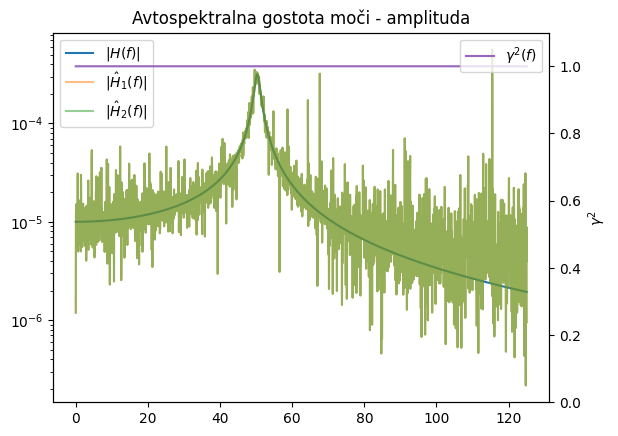

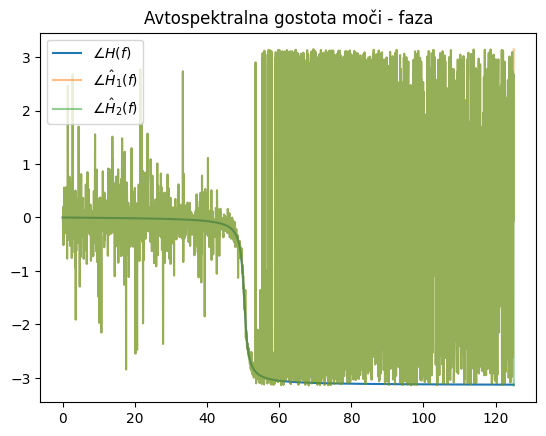

In [3]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
fs = 250
N = 5000
dt = 1./fs
time = np.arange(N)*dt

SNR_f = 20 # 20dB pomeni, da je razmerje med varianco signala in šuma 10
SNR_x = 20

σ_u = 1
σ_m = σ_u/10**(SNR_f/20) # na podlagi definirije 20*np.log10(σ_u/σ_m)

u = rng.normal(size=N, scale=σ_u)
m = rng.normal(size=N, scale=σ_m)

f = u + m # pomerjeno vzbujanje v času

scale = 1.0 / (fs*N)
U = np.fft.rfft(u) # dejansko vzbujanje sistema
F = np.fft.rfft(f) # pomerjeno vzbujanje sistema
freq = np.fft.rfftfreq(N, d=dt)

G_uu = 2*scale*np.abs(U.conj()*U)
G_ff = 2*scale*np.abs(F.conj()*F)

def alpha(freq, m, k, c):
    """
    Frekvenčna prenosna funkcija linearnega oscilatorja.
    """
    omega = 2*np.pi*freq
    return 1 / (-omega**2*m + 1j*omega*c + k)

H = alpha(freq, m=1,k=1e5,c=10)
V = H*U                      #odziv brez šuma
v = np.fft.irfft(V)        # dejanski odziv v času
σ_n = np.std(v)/10**(SNR_x/20) # na podlagi definirije 20*np.log10(σ_v/σ_n)
n = rng.normal(size=N, scale=σ_n)

x = v + n            # pomerjen odziv sistema
X = np.fft.rfft(x) # pomerjeno vzbujanje sistema

G_fx = 2*scale*F.conj()*X
G_xx = 2*scale*np.abs(X.conj()*X)
G_xf = G_fx.conj()

H1 = G_fx/G_ff
H2 = G_xx/G_xf
γ2 = np.abs(H1/H2)

fig, ax = plt.subplots()
ax.set_title('Avtospektralna gostota moči - amplituda')
ax.semilogy(freq, np.abs(H), label='$|H(f)|$')
ax.semilogy(freq, np.abs(H1), label='$|\\hat H_1(f)|$', alpha=0.5)
ax.semilogy(freq, np.abs(H2), label='$|\\hat H_2(f)|$', alpha=0.5)
ax.legend(loc=2)
ax2 = ax.twinx() 
ax2.plot(freq, γ2, 'C4', label='$\\gamma^2(f)$')
ax2.set_xlabel('f [Hz]')
ax2.set_ylabel('$\\gamma^2$')
ax2.set_ylim(0,1.1)
ax2.legend(loc=1)
plt.show()

fig, ax = plt.subplots()
ax.set_title('Avtospektralna gostota moči - faza')
ax.plot(freq, np.angle(H), label='$\\angle H(f)$')
ax.plot(freq, np.angle(H1), label='$\\angle\\hat H_1(f)$', alpha=0.5)
ax.plot(freq, np.angle(H2), label='$\\angle\\hat H_2(f)$', alpha=0.5)
ax.legend()
plt.show()

### Zgled 2

Nadaljujemo z zgledom in dodamo povprečenje po odsekih; s tem zmanjšamo frekvenčno natančnost in tudi raztros cenilke frekvenčne prenosne funkcije.

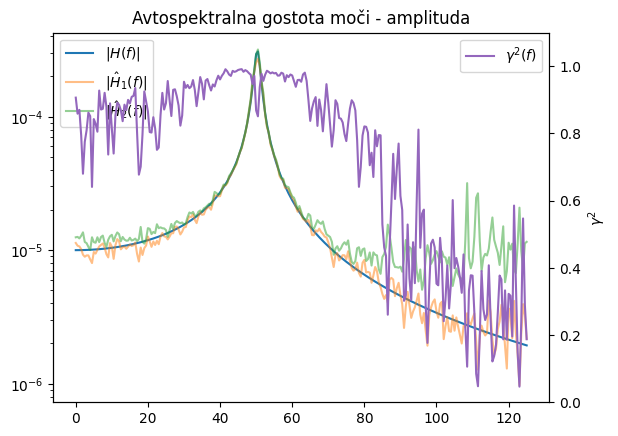

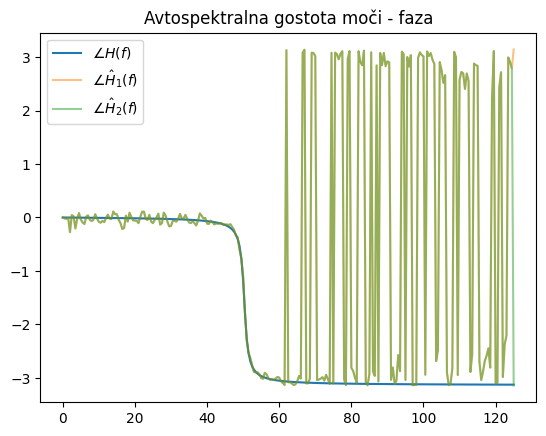

In [4]:
from scipy import signal

odsekov = 10
N_ = N//odsekov
win = signal.windows.hann(N_)              # okno
scale = 1.0 / (fs*(win*win).sum())

G_fx = np.zeros(N_//2+1, dtype=complex) #brisanje
G_ff = np.zeros(N_//2+1, dtype=complex)
G_xf = np.zeros(N_//2+1, dtype=complex)
G_xx = np.zeros(N_//2+1, dtype=complex)


for i in range(odsekov):
    f_ = f[i*N_:(i+1)*N_]
    x_ = x[i*N_:(i+1)*N_]
    f_w = win*f_          # okno
    x_w = win*x_
    F = np.fft.rfft(f_w)  #fft
    X = np.fft.rfft(x_w)
    G_fx += scale*2*np.conj(F) * X / odsekov #povprečiti je potrebno cenilke avto in križnega spektra
    G_ff += scale*2*np.conj(F) * F / odsekov 
    G_xf += scale*2*np.conj(X) * F / odsekov 
    G_xx += scale*2*np.conj(X) * X / odsekov

freq = np.fft.rfftfreq(N_, d=dt)
H = alpha(freq, m=1, k=1e5, c=10)

H1 = G_fx/G_ff
H2 = G_xx/G_xf
γ2 = np.abs(H1/H2)

sel = freq>=0
#sel = np.logical_and(freq>40, freq<60)    # za ogled dogajanja v lastni frekvenci
fig, ax = plt.subplots()
ax.set_title('Avtospektralna gostota moči - amplituda')
ax.semilogy(freq[sel], np.abs(H[sel]), label='$|H(f)|$')
ax.semilogy(freq[sel], np.abs(H1[sel]), label='$|\\hat H_1(f)|$', alpha=0.5)
ax.semilogy(freq[sel], np.abs(H2[sel]), label='$|\\hat H_2(f)|$', alpha=0.5)
ax.legend(loc=2)
ax2 = ax.twinx() 
ax2.plot(freq[sel], γ2[sel], 'C4', label='$\\gamma^2(f)$')
ax2.set_xlabel('f [Hz]')
ax2.set_ylabel('$\\gamma^2$')
ax2.set_ylim(0,1.1)
ax2.legend(loc=1)
plt.show()

fig, ax = plt.subplots()
ax.set_title('Avtospektralna gostota moči - faza')
ax.plot(freq[sel], np.angle(H[sel]), label='$\\angle H(f)$')
ax.plot(freq[sel], np.angle(H1[sel]), label='$\\angle\\hat H_1(f)$', alpha=0.5)
ax.plot(freq[sel], np.angle(H2[sel]), label='$\\angle\\hat H_2(f)$', alpha=0.5)
ax.legend()
plt.show()